In [120]:
import networkx as nx
from pymatgen.core.structure import Structure
import os
from pymatgen.io.cif import CifWriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
G = nx.MultiDiGraph()
G.add_edge(1, 2, **{'weight': 15, 'max': 3})
G.add_edge(1, 3, **{'weight': 30, 'max': 4})
G.add_edge(2, 3, **{'weight': 20, 'max': 3})
G.add_edge(2, 3, **{'weight': 20, 'max': 5})


def get_edge_weight(u, v):
    """Return the minimum weight of all edges between nodes u and v."""
    return min([e['weight'] for e in G.get_edge_data(u, v).values()])


def weighted_path_score(path):
    """Sum of edge weights in path."""
    edges = zip(path, path[1:])
    return sum(get_edge_weight(u, v) for u, v in edges)


paths = [tuple(p) for p in nx.all_simple_paths(G, 1, 1)]

# sort using the weighted path score
print(sorted(set(paths), key=weighted_path_score))

[]


In [13]:
os.getcwd()

'/home/lucasperea/Documents/GithubRep/GraphMaterials/JupyterNotebooks'

In [20]:
strc = Structure.from_file('../CifFiles/EDI.cif')

In [15]:
strc.make_supercell([2,2,1])

In [21]:
len(strc)

15

In [22]:
CifWriter(strc).write_file('../Netwrk/EDI.cif')

In [148]:
path_to_file = '../Netwrk/EDI.nt2'

G = nx.Graph()
with open(path_to_file) as f:
    line = ' '

    while line:
        line = f.readline()

        if line == 'Vertex table:\n':
            
            while line:

                line = f.readline()
                
                if line == '\n':
                    break
                else:
                    line_list = line.split()
                    key = int(line_list[0])
                    coord_x = float(line_list[1])
                    coord_y = float(line_list[2])
                    coord_z = float(line_list[3])
                    min_dist_atom = float(line_list[4])
        
                    G.add_node(key, coord=np.array([coord_x, coord_y, coord_z]), rad_max_sph=min_dist_atom)

    #                 vertex_table = vertex_table.append({'coord_x':coord_x, 'coord_y':coord_y, 'coord_z':coord_z,
    #                                                     'min_dist_atom':min_dist_atom, 'key':key},ignore_index = True)


        x_1 = len(list(range(0,(sorted(list(G.nodes), reverse=True)[0] + 1))))
        box = np.array([6.926, 6.926, 6.410])
        
        
        if line == 'Edge table:\n':
            

            while line:

                line = f.readline()
                if line == '':
                    break
                line_list = line.split()
                origin = int(line_list[0])
                destination = int(line_list[2])
                larger_radius = float(line_list[3])
                x_sim = int(line_list[4])
                y_sim = int(line_list[5])
                z_sim = int(line_list[6])
                if x_sim == 1:
                    G.add_node(destination + x_1, coord=G.nodes[destination]['coord'] + np.array([box[0], 0, 0]),
                               rad_max_sph=G.nodes[destination]['rad_max_sph'])
                    
                    G.add_edge(origin, destination + x_1, weight=larger_radius)
                    print(destination + x_1, origin, list(G.adj[destination + x_1]))
                else:
                    if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                        G.add_edge(origin, destination, weight=larger_radius)
                        
                    else:
                        pass
                    
                
                
                
#                 if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
#                     pass
#                     edge_table = edge_table.append({'origin':origin, 'destination': destination, 'x_sim':x_sim,
#                                                     'y_sim':y_sim, 'z_sim':z_sim,'larger_radius':larger_radius},
#                                                    ignore_index = True)
                    #print('change')


80 3 [3]
84 5 [5]
98 56 [56]
105 57 [57]
103 58 [58]
130 65 [65]
132 66 [66]
137 67 [67]
138 68 [68]
139 69 [69]


[139, 138, 137, 132, 130, 105, 103, 98, 84, 80, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 0]


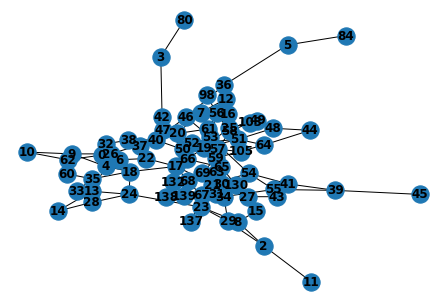

In [147]:

print(sorted(G.nodes, reverse=True))
nx.draw(G, with_labels=True, font_weight='bold')

In [149]:
path_to_file = '../Netwrk/EDI.nt2'

H = nx.Graph()

box = np.array([6.926, 6.926, 6.410])

with open(path_to_file) as f:
    line = ' '

    while line:
        line = f.readline()

        if line == 'Vertex table:\n':
            
            while line:

                line = f.readline()
                
                if line == '\n':
                    break
                else:
                    line_list = line.split()
                    key = int(line_list[0])
                    coord_x = float(line_list[1])
                    coord_y = float(line_list[2])
                    coord_z = float(line_list[3])
                    min_dist_atom = float(line_list[4])

                    H.add_node(key + x_1, coord=np.array([coord_x + box[0], coord_y, coord_z]), 
                               rad_max_sph=min_dist_atom)
        
        elif line == 'Edge table:\n':
            while line:

                line = f.readline()
                if line == '':
                    break
                else:
                    line_list = line.split()
                    origin = int(line_list[0])
                    destination = int(line_list[2])
                    larger_radius = float(line_list[3])
                    x_sim = int(line_list[4])
                    y_sim = int(line_list[5])
                    z_sim = int(line_list[6])
                    if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
    #                     G.add_node(destination + x_1, coord=G.nodes[destination]['coord'] + np.array([box[0], 0, 0]),
    #                                rad_max_sph=G.nodes[destination]['rad_max_sph'])

    #                     G.add_edge(origin, destination + x_1, weight=larger_radius)
                        H.add_edge(origin + x_1, destination + x_1, weight=larger_radius)
                    elif x_sim == -1:
                        pass
                    else:
                        pass

                    
                
                
                
#                 if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
#                     pass
#                     edge_table = edge_table.append({'origin':origin, 'destination': destination, 'x_sim':x_sim,
#                                                     'y_sim':y_sim, 'z_sim':z_sim,'larger_radius':larger_radius},
#                                                    ignore_index = True)
                    #print('change')
               

In [172]:
G.nodes[138]
G.adj[138]
G.nodes[138]
G.adj[138 - x_1]

AtlasView({17: {'weight': 2.62603}, 67: {'weight': 2.51601}, 138: {'weight': 0.759739}, 69: {'weight': 2.51601}})

In [176]:
G.add_nodes_from(H.nodes)
G.add_edges_from(H.edges)


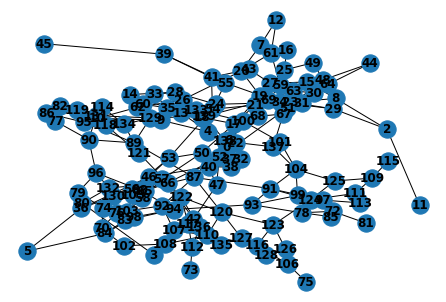

In [177]:
nx.draw(G, with_labels=True, font_weight='bold')

In [83]:
for i in list(range(0, 70)):
    pass
#     print(i)
    
len(list(range(70, 140)))

70